# Preamble and Datasets

<IPython.core.display.Javascript object>


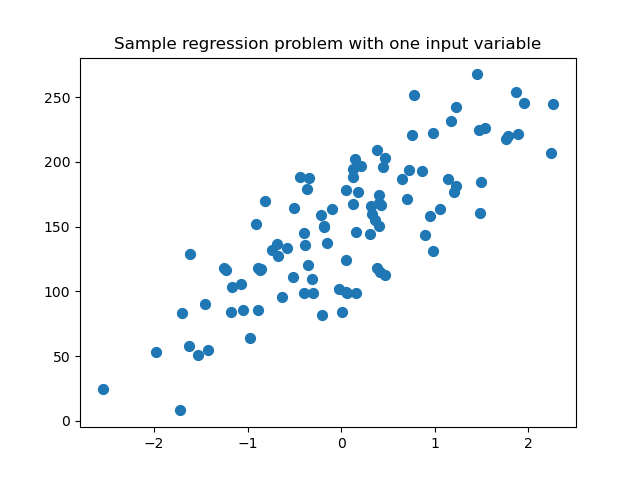

<IPython.core.display.Javascript object>


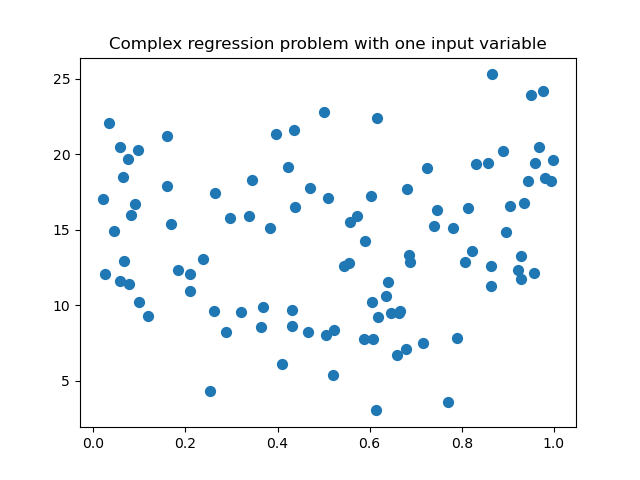

<IPython.core.display.Javascript object>


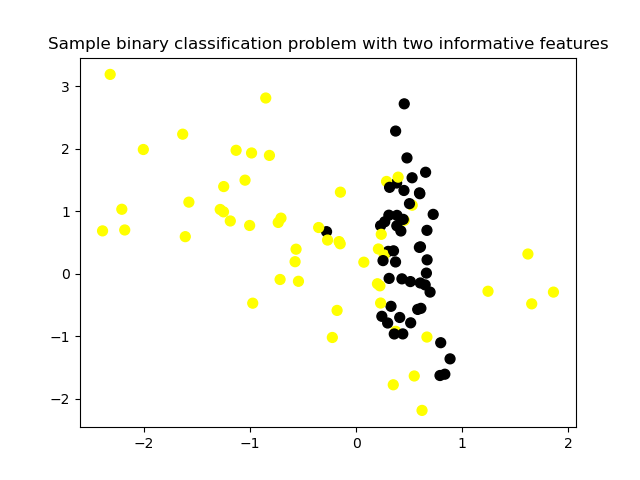

<IPython.core.display.Javascript object>


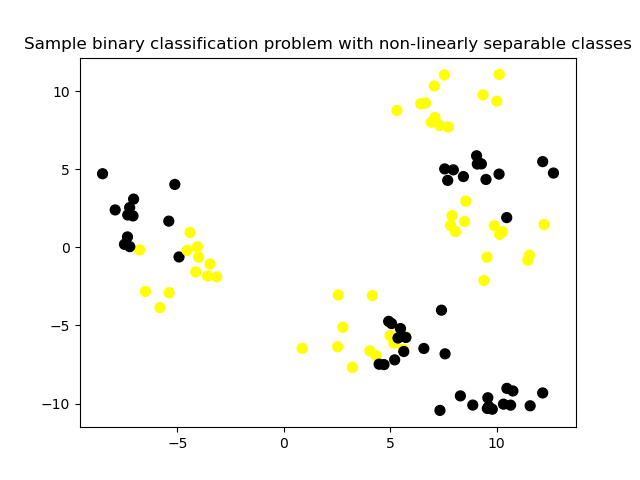

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('data/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

# Naïve Bayes Classifiers

- These classifiers are called "Naïve" because they assume that features are conditionally independet, given the class.
- In other words: they assume that, for all instances of a given class, the features have little/no correlation with each other.
- Highly efficient learning and prediction.
- Bet generalization performance may worse thar more sophisticated learning methods.
- Can be competitive for some tasks.

## Naïve Bayes Classifieres Types

- Bernoulli: binary features (e.g. word presence/absence)
- Multinomial: discrete features (e.g. word counts)
- Gaussian: continous/real-valued features
    - Statiscs computed for each class:
        - For each feature: mean, standard deviation
        
## Naïve Bayes Classifiers: Pros and Cons

### Pros:

- Easy to understand
- Simple, efficient parameter estimation 
- Works well with high dimensional data 
- Often useful as a baseline comparison against more sophisticated methods

### Cons:

- Assumption that features are conditionally independent given the class is not realistic.
- As a result, other classifier types often have better generalization performance.
- Theri confidence estimates for predictions are not very accurate.

<IPython.core.display.Javascript object>


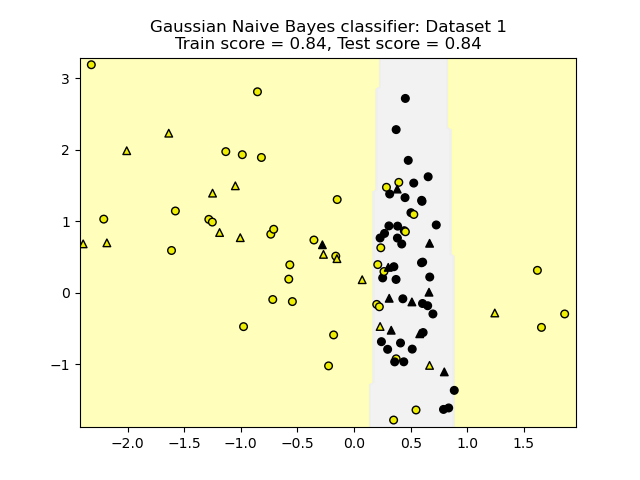

In [10]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 "Gaussian Naive Bayes classifier: Dataset 1")

<IPython.core.display.Javascript object>


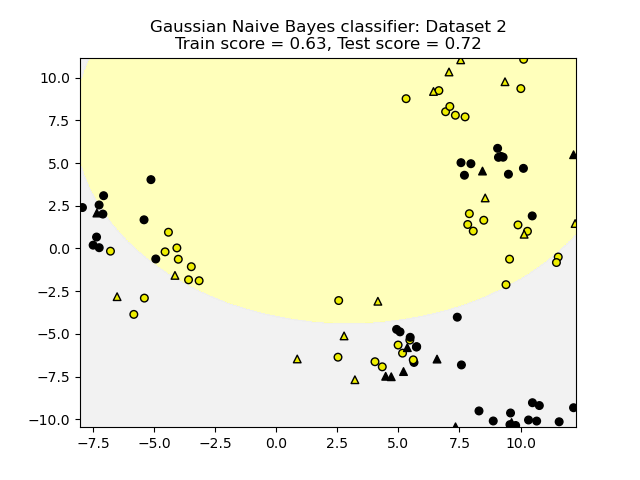

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 "Gaussian Naive Bayes classifier: Dataset 2")

## Aplication to a real-world dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


# Ensembles

An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone. Why are ensembles effective? Well, one reason is that if we have different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because each individual model might overfit to a different part of the data. By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance. 

# Ensembles of Decision Trees

## Random forests

- An ensemble of trees, not just one tree.
- Widely used, very good results on many problems. 
- sklearn.ensemble module:
    - Classification: `RandomForestClassifier`
    - Regression: `RandomForestRegressor`
- One decision tree $\rightarrow$ Prone to overfitting.
- Many decision trees $\rightarrow$ More stable, better generalization.
- Ensemble of trees should be diverse: introduce random variation into tree-building.

### Random Forest Process

First, the data used to build each tree is selected randomly and second, the features chosen in each split tests are also randomly selected. To create a random forest model you first decide on how many trees to build. This is set using the n_estimated parameter for both RandomForestClassifier and RandomForestRegressor. Each tree were built from a different random sample of the data called the bootstrap sample. Bootstrap samples are commonly used in statistics and machine learning. If your training set has N instances or samples in total, a bootstrap sample of size N is created by just repeatedly picking one of the N dataset rows at random with replacement, that is, allowing for the possibility of picking the same row again at each selection. You repeat this random selection process N times. The resulting bootstrap sample has N rows just like the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement.

### Random Forest  `max_features` Parameter

- Learning is quite sensitive to `max_features`.
- Setting `max_features = 1` leads to forests with diverse, more complex trees.
- Setting `max_features = <close to number of features>` will lead to similar forest with simpler trees.

### Prediction Using Random Forest

1. Make a prediction for every tree in the forest.
2. Combine individual predictions
    - Regression: mean of individual tree predictions.
    - Classification:
        - Each tree gives probability for each class.
        - Probabilities averaged across trees.
        - Predict the class with highest probability.
        
### Random Forest: Pros and Cons

#### Pros:

- Widely used, excellent prediction performance on many problems.
- Doesn't require careful normalization of features or extensive parameter tuning.
- Like decision trees, handles a mixtures of feature types.
- Easily parallelized across multiple CPUs.

#### Cons:

- The resulting models are often difficult for humans to interpret.
- Like decision trees, random forests may not be a food choice for very high-dimensional tasks (e.g. text classifiers) compared to fast, accurate linear models.

### Random Forest: RandomForestClassifier Key Parameters

- `n_estimators`: number of trees to use in ensemble (default 10).
    - Should be larger for larger datasets to reduce oberfitting (but uses more computation).
- `max_features`: has a strong effect on performance. Inlfluences the diversity of trees in the forest.
    - Default works well in practice, but adjusting may lead to some further gains. 
        - Classification: is the square root of the total number of features. 
        - Regression: is the log base two of the total number of features.
- `max_depth`: controls the depth of each tree (default: None. Splits until all leaves are pure).
- `n_jobs`: How many cores to use in parallel during training.
- Choose a fixed setting for the `random_state` parameter if you need reproducible results.

<IPython.core.display.Javascript object>


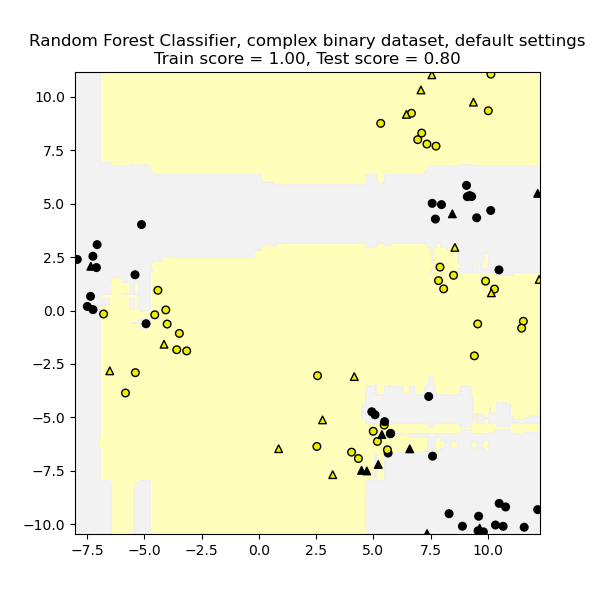

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Random forest: Fruit dataset

<IPython.core.display.Javascript object>


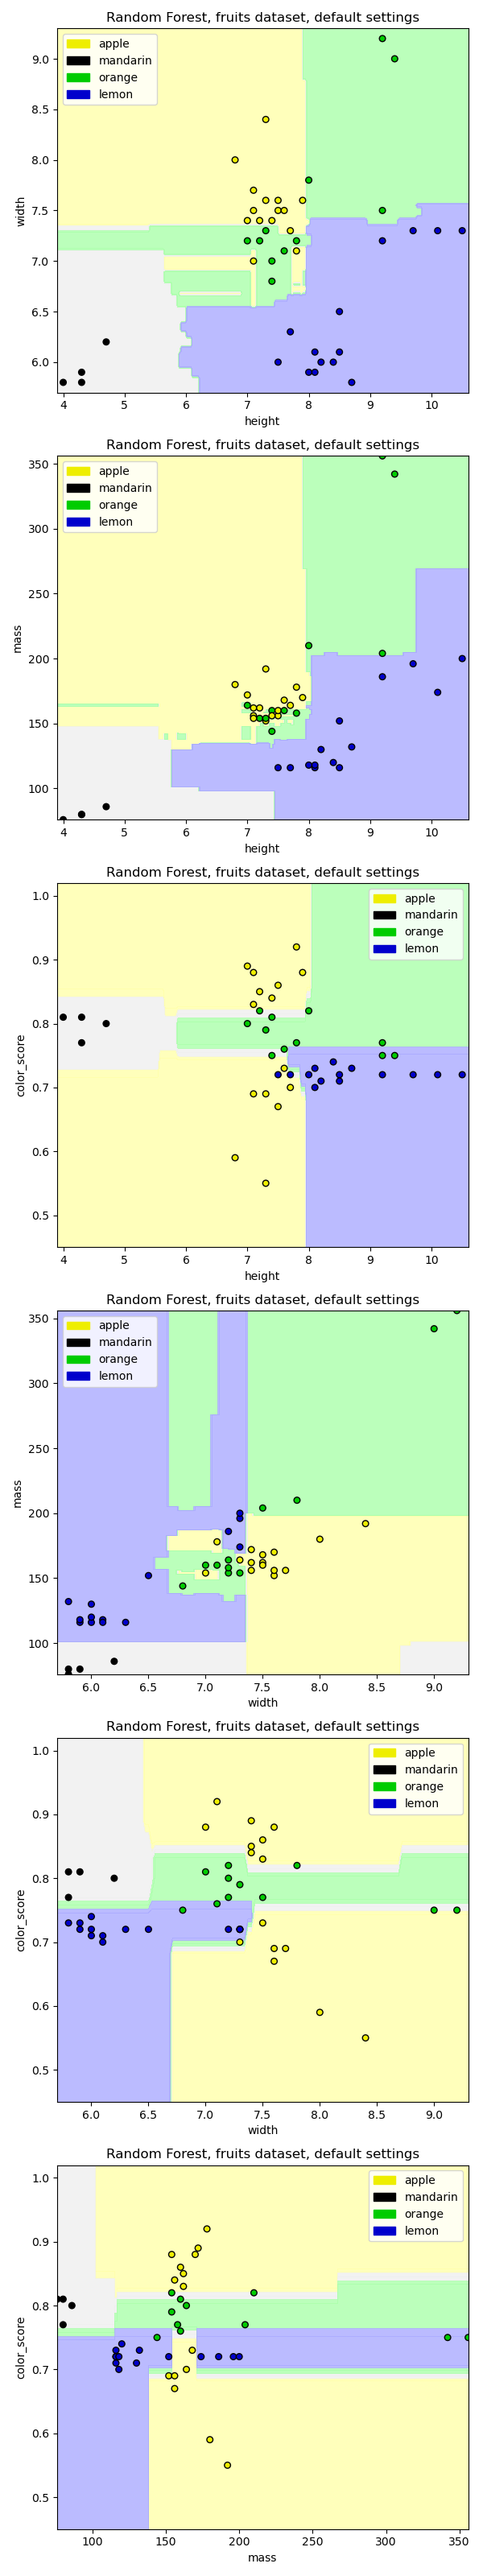

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Random Forest on a real-world dataset

In [22]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 9, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.98


## Gradient-boosted decision trees

**The key idea** of gradient boosted decision trees is that they build a series of trees, where each tree is trained, so that it attempts to correct the mistakes of the previous tree in the series.

- Training builds a series of small decision trees.
- Each tree attempts to correct errors from the previous stage.
- The `learning_rate` controls how gard each nes tree tries to correct remaining mistakes from previus round.
    - High learning rate: more complex trees.
    - Low learning rate: simpler trees.

### GBDT: Pros and Cons

#### Pros:

- Often best off-the-shelf accuracy on many problems.
- Using model for prediction requires only modest memory and is fast.
- Doesn't require careful normalization of features to perform well.
- Like decision trees, handles a mixture of feature types.

#### Cons:

- Like random forest, the models are often difficult for humans to interpret.
- Requires careful tuning of the learning rate and other parameters.
- Training can require signinficant computation.
- Like decision trees, not recommended for text classification and other problems with very high dimensional sparse features, for accuracy and computational cost reasons.

### GBDT: GradientBoostingClassifier Key Parameters

- `n_estimators`: sets the number of small decision trees to use (weak learners) in the ensemble.
- `learning_rate`: controls emphasis on fixing errors from previous iteration.
- The above two are typically tuned together.
- `n_estimators` is adjusted first to best exploit memory and CPUs during training, ther other parameters.
- `max_depth` is typically set to a small value (e.g. 3-5) for most applications.

<IPython.core.display.Javascript object>


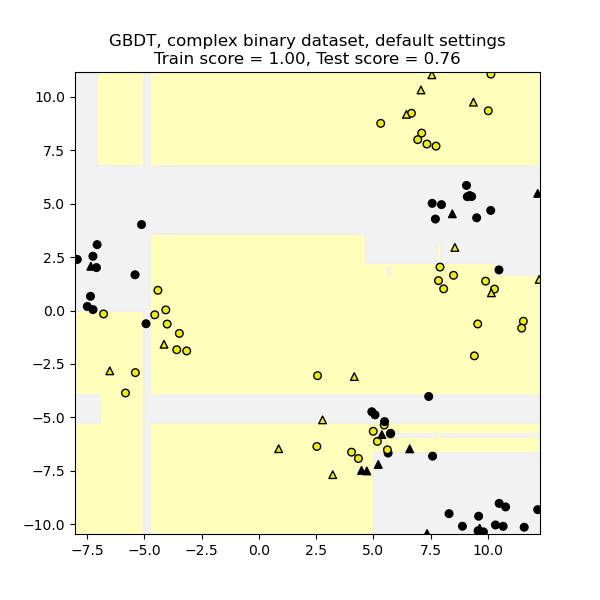

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Gradient boosted decision trees: Fruit dataset

<IPython.core.display.Javascript object>


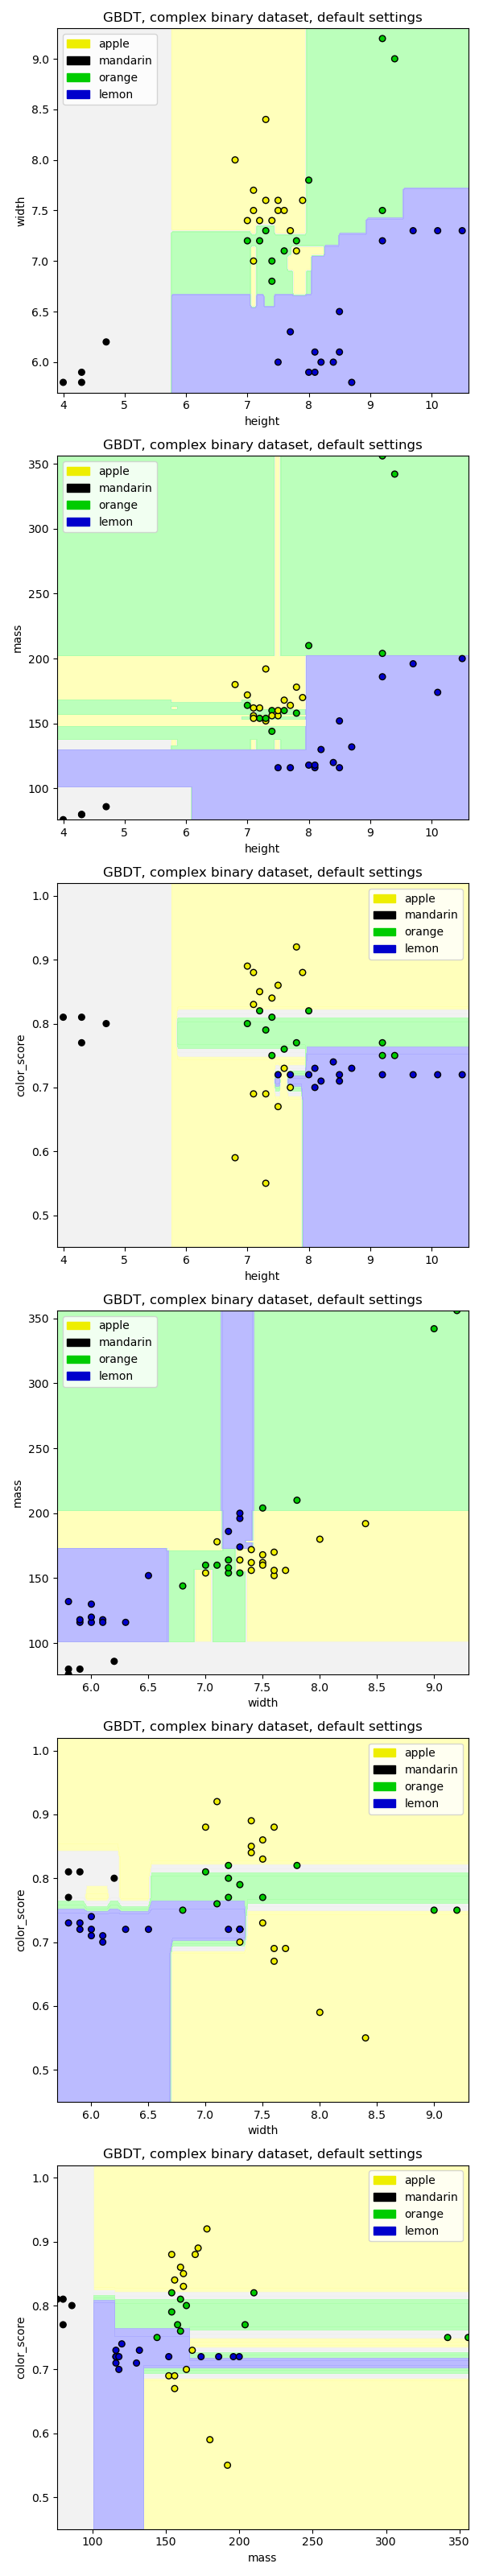

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Gradient-boosted decision trees on a real-world dataset

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=5)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 4, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=4)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 1, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=1)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.01, max_depth=5)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.92

Breast cancer dataset (learning_rate=0.01, max_depth=4)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.92

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=1)
Accuracy of GBDT classifier on training set: 0.93
Accuracy of GBDT classifier on test set: 0.96
